In [1]:
import numpy as np 
import scipy.stats as ss 
import matplotlib.pyplot as plt

import quantile_utilities as qu

## One-Dimensional Example
Having imported our `quantile_utilities` library, let's try making some quantile-quantile (Q-Q) and probability-probability (P-P) plots for a univariate example. We'll do something similar to Figure 1 in the [Thorp et al. (2025)](https://arxiv.org/abs/2402.00930) paper. As our reference distribution we'll use a unit Gaussian, and we'll compare this to a Student-$t$ with two degrees of freedom.

In [2]:
N = 1000
x_ref = ss.norm.rvs(loc=0, scale=1, size=N)
x_alt = ss.t.rvs(df=2, size=N)

Now, let's use the `qq_plot` and `pp_plot` functions from `quantile_utilities` to compare the distributions.

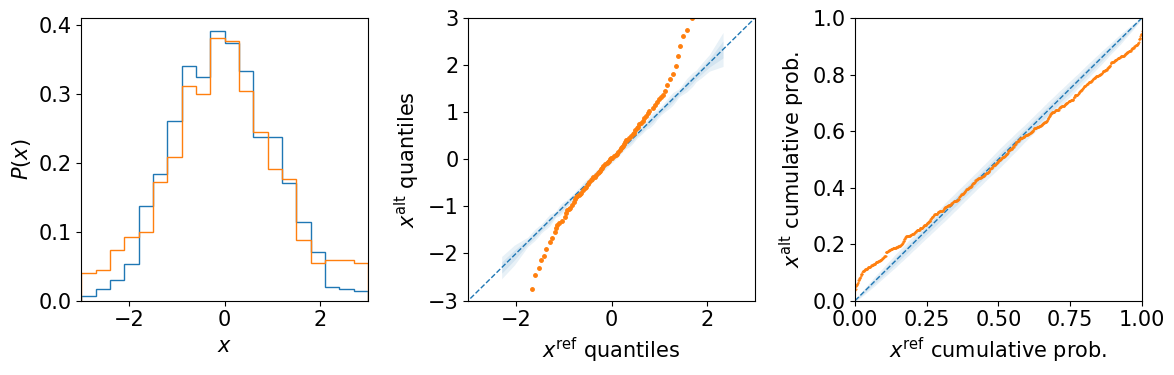

In [3]:
plt.rcParams.update({"font.size": 15})
# we'll set up a 3-panel plot
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
# we can plot histograms on the first axis...
bins = np.linspace(-3, 3, 21)
ax[0].hist(x_ref, color="tab:blue", histtype="step", density=True, bins=bins)
ax[0].hist(x_alt, color="tab:orange", histtype="step", density=True, bins=bins)
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$P(x)$")
ax[0].set_xlim(-3, 3)
# ...and a Q-Q plot on the second...
qu.qq_plot(x_ref, x_alt, B=200, ax=ax[1], xlabel="$x^\\mathrm{ref}$ quantiles", ylabel="$x^\\mathrm{alt}$ quantiles")
ax[1].set_xlim(-3, 3)
ax[1].set_ylim(-3, 3)
# ... and a P-P plot on the third
qu.pp_plot(x_ref, x_alt, B=200, ax=ax[2], xlabel="$x^\\mathrm{ref}$ cumulative prob.", ylabel="$x^\\mathrm{alt}$ cumulative prob.", markersize=1)
ax[2].set_xlim(0,1)
ax[2].set_ylim(0,1)
plt.tight_layout()
plt.show()

We can also try adding a third distribution into the mix by chaining together calls to our plotting functions.

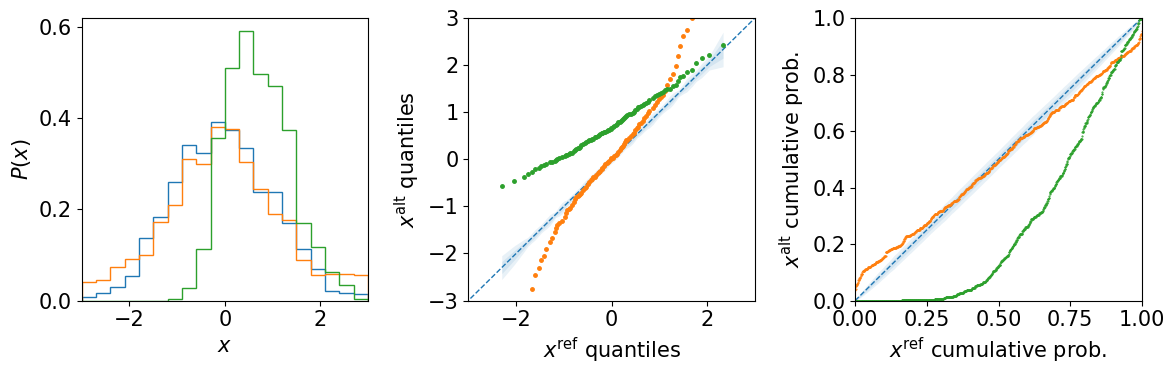

In [4]:
x_alt_2 = ss.skewnorm.rvs(a=2, loc=0, scale=1, size=N)

# now we'll use more or less the same plotting calls as before
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

bins = np.linspace(-3, 3, 21)
ax[0].hist(x_ref, color="tab:blue", histtype="step", density=True, bins=bins)
ax[0].hist(x_alt, color="tab:orange", histtype="step", density=True, bins=bins)
ax[0].hist(x_alt_2, color="tab:green", histtype="step", density=True, bins=bins)
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$P(x)$")
ax[0].set_xlim(-3, 3)

qu.qq_plot(x_ref, x_alt, B=200, ax=ax[1], xlabel="$x^\\mathrm{ref}$ quantiles", ylabel="$x^\\mathrm{alt}$ quantiles")
qu.qq_plot(x_ref, x_alt_2, B=None, ax=ax[1], xlabel="$x^\\mathrm{ref}$ quantiles", ylabel="$x^\\mathrm{alt}$ quantiles", color="tab:green", diag_linestyle="")
ax[1].set_xlim(-3, 3)
ax[1].set_ylim(-3, 3)

qu.pp_plot(x_ref, x_alt, B=200, ax=ax[2], xlabel="$x^\\mathrm{ref}$ cumulative prob.", ylabel="$x^\\mathrm{alt}$ cumulative prob.", markersize=1)
qu.pp_plot(x_ref, x_alt_2, B=None, ax=ax[2], xlabel="$x^\\mathrm{ref}$ cumulative prob.", ylabel="$x^\\mathrm{alt}$ cumulative prob.", markersize=1, color="tab:green", diag_linestyle="")
ax[2].set_xlim(0,1)
ax[2].set_ylim(0,1)

plt.tight_layout()
plt.show()

If we're interested in a numerical summary of these plots, there are a few things we can try. The largest deviation below the diagonal in the P-P plot will be equal to the Kolmogorov-Smirnov (K-S) statistic. We can compute this using `scipy`.

In [5]:
from IPython.display import display, Markdown # things to enable pretty-printing

Dks, pks = ss.ks_2samp(x_ref, x_alt)
Dks_2, pks_2 = ss.ks_2samp(x_ref, x_alt_2)
display(Markdown("For Student-$t$ vs. unit Gaussian: $\mathcal{{D}}_\mathrm{{KS}}={:.4f}$ ($p={:.4f}$)".format(Dks, pks)))
display(Markdown("For skew-normal vs. unit Gaussian: $\mathcal{{D}}_\mathrm{{KS}}={:.4f}$ ($p={:.4f}$)".format(Dks_2, pks_2)))

For Student-$t$ vs. unit Gaussian: $\mathcal{D}_\mathrm{KS}=0.0810$ ($p=0.0028$)

For skew-normal vs. unit Gaussian: $\mathcal{D}_\mathrm{KS}=0.3890$ ($p=0.0000$)

So, this gives a similar impression to the P-P plot itself. The P-P plot and K-S statistic are most sensitive to shifts in the bulk of the distribution. This is not so big for the Student-$t$, which is most different in the tail behaviour, but it very large for the skew-normal distribution.

Another statistic that might be interesting is the $p$-Wasserstein distance between the distributions. This is given by the distance (using the $L^p$ norm) between quantile functions, so it has a nice connection to the Q-Q plot. We've included a function in the `quantile_utilities` library to compute this (by computing the root mean square of the sorted sample arrays).

In [6]:
W = qu.wp_univariate(x_ref, x_alt)
W_2 = qu.wp_univariate(x_ref, x_alt_2)

display(Markdown("For Student-$t$ vs. unit Gaussian: $\mathcal{{W}}_2={:.4f}$".format(W)))
display(Markdown("For skew-normal vs. unit Gaussian: $\mathcal{{W}}_2={:.4f}$".format(W_2)))

For Student-$t$ vs. unit Gaussian: $\mathcal{W}_2=2.3112$

For skew-normal vs. unit Gaussian: $\mathcal{W}_2=0.8341$

This comes out a larger for the Student-$t$. Like the Q-Q plot, the Wasserstein distance is more sensitive to the tails of the distributions.

Of course, for simple distributions like these, the quantile functions and cumulative distribution functions can be computed easily, so we can plot them directly to check that things look right. Helpfully, `scipy.stats` gives us everything we need.

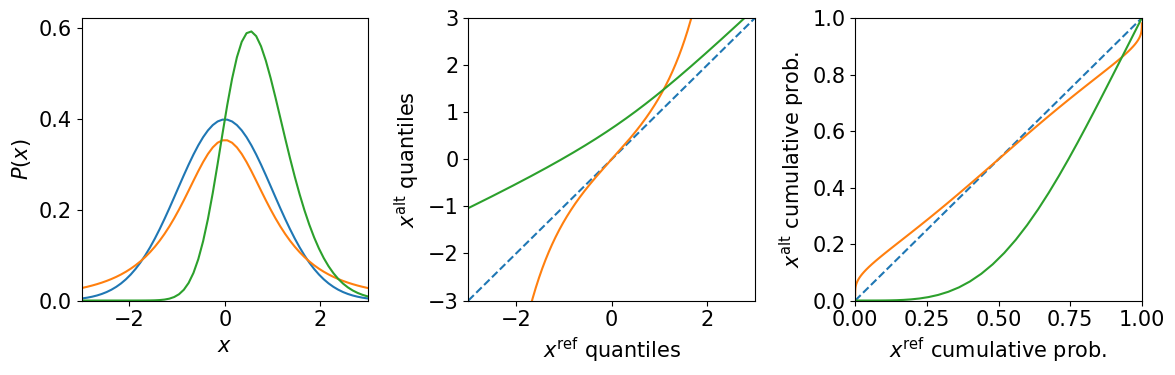

In [7]:
p = np.linspace(0, 1, 1000)
x = np.linspace(-5, 5, 100)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].plot(x, ss.norm.pdf(x), color="tab:blue")
ax[0].plot(x, ss.t.pdf(x, df=2), color="tab:orange")
ax[0].plot(x, ss.skewnorm.pdf(x, a=2), color="tab:green")
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$P(x)$")
ax[0].set_xlim(-3, 3)
ax[0].set_ylim(0, None)

# the ppf method of any scipy.stats distribution gives the quantile function
x_ref_quantiles = ss.norm.ppf(p)
ax[1].plot([-3, 3], [-3, 3], color="tab:blue", linestyle="--")
ax[1].plot(x_ref_quantiles, ss.t.ppf(p, df=2), color="tab:orange")
ax[1].plot(x_ref_quantiles, ss.skewnorm.ppf(p, a=2), color="tab:green")
ax[1].set_xlim(-3, 3)
ax[1].set_ylim(-3, 3)
ax[1].set_xlabel("$x^\\mathrm{ref}$ quantiles") 
ax[1].set_ylabel("$x^\\mathrm{alt}$ quantiles")

# the ppf method of any scipy.stats distribution gives the quantile function
x_ref_cumprobs = ss.norm.cdf(x)
ax[2].plot([0, 1], [0, 1], color="tab:blue", linestyle="--")
ax[2].plot(x_ref_cumprobs, ss.t.cdf(x, df=2), color="tab:orange")
ax[2].plot(x_ref_cumprobs, ss.skewnorm.cdf(x, a=2), color="tab:green")
ax[2].set_xlim(0, 1)
ax[2].set_ylim(0, 1)
ax[2].set_xlabel("$x^\\mathrm{ref}$ cumulative prob.") 
ax[2].set_ylabel("$x^\\mathrm{alt}$ cumulative prob.")

plt.tight_layout()
plt.show()

That looks good! And it might look familiar from Figure 1 of the paper.

## Two-Dimensional Example

Now, let's try a two-dimensional problem. We can try a combination of distributions from Figure 3 of the paper, with a multivariate Gaussian as our reference distribution. Alternative "A" will be a rotated version of this, and alternative "B" will be a multivariate Student-$t$. For Alternative "C", we will use a bivariate skew-normal.

In [8]:
N = 4000
Sigma = np.array([[1.0, 0.75],[0.75, 1.0]]) # covariance/shape matrix
X_ref = ss.multivariate_normal.rvs(cov=Sigma, size=N) # multivariate normal
X_A = ss.multivariate_normal.rvs(cov=[[1.0, -0.75],[-0.75, 1.0]], size=N) # rotated version
X_B = ss.multivariate_t.rvs(shape=Sigma, df=3, size=N) # multivariate t

The bivariate skew-normal we used in the paper isn't in `scipy.stats`. Luckily, it isn't too difficult to generate draws from it. We'll define a function below for this, based on the transformation given in [Azzalini & Capitanio (1999)](https://arxiv.org/abs/0911.2093). We first draw a set of three latent variables $(\tilde{x}_0, \tilde{\mathbf{x}})^\top$ from a multivariate normal:
$$
\begin{bmatrix}
\tilde{x}_0\\
\tilde{\mathbf{x}}
\end{bmatrix} \sim
N(\mathbf{0}, \mathbf{\Omega}).
$$
Where $\mathbf{\Omega}$ is a correlation matrix set by three hyperparameters $\omega$, $\delta_1$, and $\delta_2$:
$$
\mathbf{\Omega} = \begin{bmatrix}
1 & \delta_1 & \delta_2\\
\delta_1 & 1 & \omega\\
\delta_2 & \omega & 1
\end{bmatrix}.
$$
Then, we can generate a sample $\mathbf{x}$ from a bivariate skew-normal by taking:
$$
\mathbf{x} = \begin{cases}
\tilde{\mathbf{x}} &\text{ if } \tilde{x}_0>0\\
-\tilde{\mathbf{x}} &\text{ otherwise}
\end{cases}.
$$


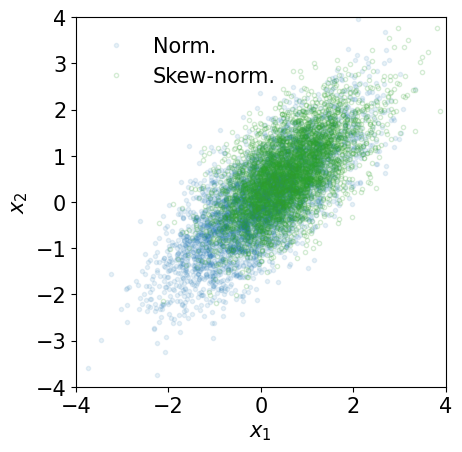

In [9]:
def bivariate_skewn_rvs(omega, del1, del2, N):
    """
    Generate bivariate skew-normal random variables.
    
    Parameters
    ----------
    omega : float
        Correlation
    del1 : float
        Shape parameter within [-1, 1]
    del2 : float
        Shape parameter within [-1, 1]
    N : int
        Number of samples to draw
        
    Returns
    -------
    X : numpy.array
        Array of shape (N,2) containing draws
    """
    Omega = np.eye(3)
    Omega[2,1] = omega
    Omega[1,2] = omega
    Omega[0,1] = del1
    Omega[0,2] = del2
    Omega[1,0] = del1
    Omega[2,0] = del2
    X_tilde = np.random.multivariate_normal(mean=np.zeros(3), cov=Omega, size=N)
    X = np.zeros((N,2))
    pos = X_tilde[:,0] > 0
    X[pos,:] = X_tilde[pos,1:]
    X[~pos,:] = -X_tilde[~pos,1:]
    return X

# draw from a bivariate skew normal (we'll do something symetric)
X_C = bivariate_skewn_rvs(0.75, 0.75, 0.75, N)
# let's plot the samples from this, to see what they look like compared to the reference
plt.plot(X_ref[:,0], X_ref[:,1], color="tab:blue", marker=".", linestyle="", alpha=0.1, label="Norm.")
plt.plot(X_C[:,0], X_C[:,1], markerfacecolor="none", markeredgecolor="tab:green", marker=".", linestyle="", alpha=0.2, label="Skew-norm.")
plt.legend(frameon=False, loc="upper left")
plt.xlabel("$x_{1}$")
plt.ylabel("$x_{2}$")
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.gca().set_aspect("equal")
plt.show()

Now, lets compare the distributions along the first principal axis of the reference sample. First, we'll use the `pca` function from our `quantile_utilities` library to find the principal axes of $\mathbf{X}^\text{ref}$.

In [10]:
l_ref, V_ref, Y_ref = qu.pca(X_ref)

display(Markdown("Eigenvalues: $\mathbf{{\lambda}}^\\mathrm{{ref}}=[{:.3f}, {:.3f}]^\\top$".format(*l_ref)))
display(Markdown("First eigenvector: $\mathbf{{v}}_1^\\mathrm{{ref}}=[{:.3f}, {:.3f}]^\\top$".format(*V_ref[:,0])))
display(Markdown("Second eigenvector: $\mathbf{{v}}_2^\\mathrm{{ref}}=[{:.3f}, {:.3f}]^\\top$".format(*V_ref[:,1])))

Eigenvalues: $\mathbf{\lambda}^\mathrm{ref}=[1.759, 0.250]^\top$

First eigenvector: $\mathbf{v}_1^\mathrm{ref}=[0.712, 0.702]^\top$

Second eigenvector: $\mathbf{v}_2^\mathrm{ref}=[-0.702, 0.712]^\top$

It looks like the first component accounts for a lot more of the variance in $\mathbf{X}^\text{ref}$, and is roughly parallel to the diagonal. Now we can project the other samples along the same axes by multiplying them into $\mathbf{v}_1^\text{ref}$. So for a general alternate distribution, $\mathbf{y}_1^\text{alt} = \mathbf{X}^\text{alt}\cdot\mathbf{v}_1^\text{ref}$.

In [11]:
Y_A = X_A @ V_ref[:,0]
Y_B = X_B @ V_ref[:,0]
Y_C = X_C @ V_ref[:,0]

And now, we can make some Q-Q and P-P plots to compare the distributions along this axis. This time, we'll make an "unbinned" Q-Q plot.

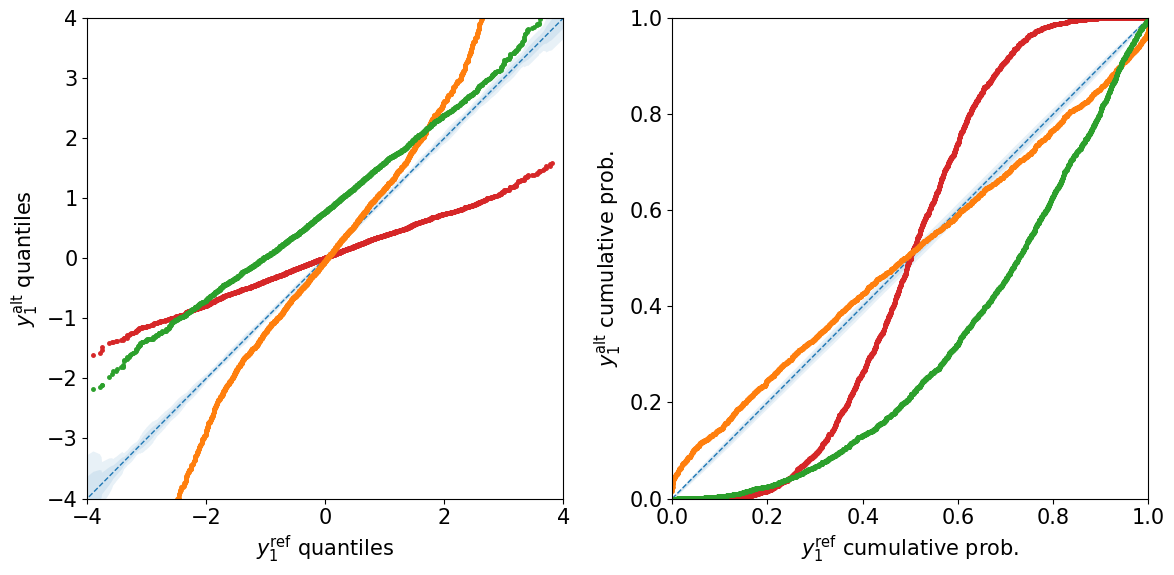

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Q-Q plots
qu.qq_plot(Y_ref[:,0], Y_A, Q=None, B=200, ax=ax[0], color="tab:red", xlabel="$y_1^\\mathrm{ref}$ quantiles", ylabel="$y_1^\\mathrm{alt}$ quantiles") # rotated normal
qu.qq_plot(Y_ref[:,0], Y_B, Q=None, B=None, ax=ax[0], color="tab:orange", xlabel="$y_1^\\mathrm{ref}$ quantiles", ylabel="$y_1^\\mathrm{alt}$ quantiles", diag_linestyle="") # Student-t
qu.qq_plot(Y_ref[:,0], Y_C, Q=None, B=None, ax=ax[0], color="tab:green", xlabel="$y_1^\\mathrm{ref}$ quantiles", ylabel="$y_1^\\mathrm{alt}$ quantiles", diag_linestyle="") # skew normal
ax[0].set_xlim(-4, 4)
ax[0].set_ylim(-4, 4)

# P-P plots
qu.pp_plot(Y_ref[:,0], Y_A, Q=None, B=200, ax=ax[1], color="tab:red", xlabel="$y_1^\\mathrm{ref}$ cumulative prob.", ylabel="$y_1^\\mathrm{alt}$ cumulative prob.") # rotated normal
qu.pp_plot(Y_ref[:,0], Y_B, Q=None, B=None, ax=ax[1], color="tab:orange", xlabel="$y_1^\\mathrm{ref}$ cumulative prob.", ylabel="$y_1^\\mathrm{alt}$ cumulative prob.", diag_linestyle="") # Student-t
qu.pp_plot(Y_ref[:,0], Y_C, Q=None, B=None, ax=ax[1], color="tab:green", xlabel="$y_1^\\mathrm{ref}$ cumulative prob.", ylabel="$y_1^\\mathrm{alt}$ cumulative prob.", diag_linestyle="") # skew normal
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)
plt.tight_layout()
plt.show()

Hopefully these will look familiar from Figure 3 of the paper.